# Build House Price Prediction Model

Steps

1) Data Preprocessing;   cleaning
2) EDA - Explore 
3) Build & Test the Model  --> ML Algorithm (linear regression)
4) Model Evaluation (Performance)
5) Model Tuning ---  different models (algorithms) -- comparison
6) Model Deployment

In [1]:
# Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dataset
housing_df = pd.read_csv('d:/datasets/analytics/USA_Housing.csv')

In [3]:
housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# data preprocessing

In [6]:
housing_df.columns   # variables

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
len(housing_df)

5000

In [7]:
# missing data
housing_df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
# Correlation
housing_df.corr()    # -1 to 1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [9]:
# X & y

X = housing_df[['Avg. Area House Age']]
y = housing_df['Price']

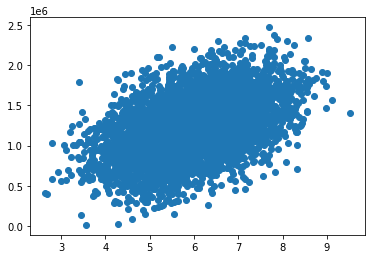

In [28]:
plt.scatter(X,y)

In [11]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [13]:
# split the data into training & test sets

from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [15]:
len(X_train)

3750

In [16]:
len(X_test)

1250

In [17]:
# building the model ... import the algorithm
from sklearn.linear_model import LinearRegression

In [18]:
# Initialize / instantiate the model
ABC_model = LinearRegression()

In [19]:
# Train the model
ABC_model.fit(X_train,y_train)   # input & out

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Model evaluation

In [21]:
# intercept
print (ABC_model.intercept_)

242189.75355667376


In [22]:
print (ABC_model.coef_)

[165231.47294056]


In [23]:
# Test the model

predictions = ABC_model.predict(X_test)

In [24]:
print(predictions)

[1326486.44658527 1240531.54793926 1299093.44919202 ... 1043039.02547121
 1251123.92284317 1815042.69575271]


In [27]:
# single prediction
age = int(input("House Age:"))

print ("You can expect the following price of your house:")
print (ABC_model.predict([[age]]))

House Age:5
You can expect the following price of your house:
[1068347.11825945]


In [26]:
print (ABC_model.predict([[10]]))

[1894504.48296223]


In [ ]:
# Performance Metrics;    RMSE (Root Mean Squared error)
# and R squared 